## –ó–∞–≥—Ä—É–∑–∏–º –Ω—É–∂–Ω—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [1]:
# –∏–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫
import time
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold,
                                     cross_val_predict)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import (silhouette_score, roc_auc_score, confusion_matrix, classification_report, 
                             precision_recall_fscore_support, accuracy_score, precision_score, recall_score,
                             make_scorer, f1_score)
from catboost import CatBoost, CatBoostClassifier, Pool

%matplotlib inline

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', None)

In [2]:
# –∑–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤
train = pd.read_csv("train_dataset_train.csv", parse_dates=True, infer_datetime_format=True)
test = pd.read_csv("test_dataset_test.csv", parse_dates=True, infer_datetime_format=True)

In [3]:
# –ø—Ä–æ—Å–º–æ—Ç—Ä —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏
train.shape, test.shape

((200000, 59), (84997, 58))

## –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –¥–∞—Ç–∞—Å–µ—Ç –ø–æ –±–ª–∏–∂–µ

In [12]:
# –ø–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫
train.head(5)

id  age_indicator    month_id  student_id  program_id carts_created_at  \
0   15182           32.0   9/30/2020     6694527        1469        8/26/2020   
1   89385            NaN   6/30/2021     6712877        1392         8/5/2020   
2   47931            NaN   2/28/2021     6659444         376        6/20/2020   
3  279085            1.0  11/30/2021     7151591        1160        4/14/2021   
4    7806           30.0  10/31/2020     6705666         952        7/19/2020   

   spent_time_total  spent_time_to_complete_hw  completed_hw  failed_hw  \
0             163.0                        0.0           1.0        0.0   
1               NaN                        NaN           NaN        NaN   
2               NaN                        NaN           NaN        NaN   
3               NaN                        NaN           NaN        NaN   
4               NaN                        NaN           NaN        NaN   

   reworked_hw  interacted_hw  avg_hw_mark  test_with_good_mark  \
0         17.0            3.0        100.0                 12.0   
1          NaN            NaN          NaN                  NaN   
2          NaN            NaN          NaN                  NaN   
3          NaN            NaN          NaN                  NaN   
4          NaN            NaN          NaN                  NaN   

   test_with_great_mark  webinars  avg_quiz_result  notes  hw_leader  lessons  \
0                   8.0       0.0              NaN  147.0        0.0     14.0   
1                   NaN       NaN              NaN    NaN        NaN      NaN   
2                   NaN       NaN              NaN    NaN        NaN      NaN   
3                   NaN       NaN              NaN    NaN        NaN      NaN   
4                   NaN       NaN              NaN    NaN        NaN      NaN   

   activity  bought_d1  bought_d2  bought_d3  bought_d4  bought_d5  \
0      32.0          0          0          0          0          0   
1       NaN          0          0          0          0          0   
2       NaN          0          0          0          0          0   
3       NaN          0          0          0          0          0   
4       NaN          0          0          0          0          0   

   bought_avg_duration  payment_type promo   price communication_type  \
0                  NaN             1     + 20043.0              phone   
1                  NaN             1     - 15057.3              order   
2                  NaN             1     + 23389.0                web   
3                  NaN             1     - 22260.6              order   
4                  NaN             1     -  7255.5              order   

   auto_payment ABC city country  gender  speed_recall       os browser  \
0             0   D  NaN     NaN     1.0           NaN      NaN     NaN   
1             1   A  NaN     NaN     0.0           1.0      NaN     NaN   
2             0   D  NaN     NaN     0.0           NaN      NaN     NaN   
3             1   B  NaN     NaN     1.0           NaN  Windows  Chrome   
4             1   A  NaN     NaN     1.0           NaN      NaN     NaN   

  platform  m_avg_talk_duration  m_avg_duration  m_missed_calls  \
0      NaN                  NaN             NaN             NaN   
1      NaN                  NaN             NaN             NaN   
2      NaN                  NaN             NaN             NaN   
3       pc                  NaN             NaN             NaN   
4      NaN                  NaN             NaN             NaN   

   m_total_calls  m_was_conversations  m_total_duration  p_avg_talk_duration  \
0            NaN                  NaN               NaN                  NaN   
1            NaN                  NaN               NaN                  NaN   
2            NaN                  NaN               NaN                  NaN   
3            NaN                  NaN               NaN                  NaN   
4            NaN                  NaN               NaN          

–ó–∞–º–µ—á–µ–Ω–æ –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –¥–∞–Ω–Ω—ã—Ö. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —Å–æ—Å—Ç–∞–≤ –≤—Å–µ—Ö –ø–æ–ª–µ–π –∏ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞–Ω–Ω—ã—Ö.

In [13]:
# –æ–±–∑–æ—Ä —Å–æ—Å—Ç–∞–≤–∞ –∫–æ–ª–æ–Ω–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 59 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   age_indicator              159123 non-null  float64
 2   month_id                   200000 non-null  object 
 3   student_id                 200000 non-null  int64  
 4   program_id                 200000 non-null  int64  
 5   carts_created_at           200000 non-null  object 
 6   spent_time_total           86309 non-null   float64
 7   spent_time_to_complete_hw  42467 non-null   float64
 8   completed_hw               97599 non-null   float64
 9   failed_hw                  97599 non-null   float64
 10  reworked_hw                97599 non-null   float64
 11  interacted_hw              97599 non-null   float64
 12  avg_hw_mark                44496 non-null   float64
 13  test_with_good_mark        97

In [9]:
# –ø–æ–¥—Å—á—ë—Ç –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
train.isna().sum()

id                                0
age_indicator                 40877
month_id                          0
student_id                        0
program_id                        0
carts_created_at                  0
spent_time_total             113691
spent_time_to_complete_hw    157533
completed_hw                 102401
failed_hw                    102401
reworked_hw                  102401
interacted_hw                102401
avg_hw_mark                  155504
test_with_good_mark          102401
test_with_great_mark         102401
webinars                     102401
avg_quiz_result              183741
notes                        102401
hw_leader                    102401
lessons                      102401
activity                     102401
bought_d1                         0
bought_d2                         0
bought_d3                         0
bought_d4                         0
bought_d5                         0
bought_avg_duration          189641
payment_type                

–í –¥–∞—Ç–∞—Å–µ—Ç–µ –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π. –ü–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –∑–Ω–∞—á–µ–Ω–∏–π, –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª—É—á–∞—è—Ö —É–∫–∞–∑–∞—Ç—å –Ω—É–ª–∏, –≤ –¥—Ä—É–≥–∏—Ö –∑–∞–ø–æ–ª–Ω–∏—Ç—å –º–µ–¥–∏–∞–Ω–æ–π. –¢–∞–∫ –∂–µ —Å—á–∏—Ç–∞—é, —á—Ç–æ –º–æ–∂–Ω–æ –æ—Ç–±—Ä–æ—Å–∏—Ç—å –∫–æ–ª–æ–Ω–∫–∏ —Å –¥–∞—Ç–∞–º–∏.

In [58]:
train.browser.value_counts()

Chrome                        30557
Mobile Safari                 12364
Chrome Mobile                  8239
Yandex Browser                 8204
Safari                         5128
Firefox                        2682
Opera                          2444
Edge                           1858
Instagram                      1630
Samsung Internet               1258
Chrome Mobile iOS              1010
MiuiBrowser                     615
Google                          373
Facebook                        298
Opera Mobile                    245
Chrome Mobile WebView           161
Firefox Mobile                  112
YandexSearch                     55
HeadlessChrome                   42
Mobile Safari UI/WKWebView       32
Firefox iOS                      22
Edge Mobile                      16
Chromium                         11
UC Browser                        7
Iron                              6
Android                           5
Name: browser, dtype: int64

In [51]:
train.os.value_counts()

Windows      36895
iOS          15665
Android      14096
Mac OS X     10097
Linux          439
Ubuntu         155
Fedora          14
Chrome OS       13
Name: os, dtype: int64

In [59]:
train.platform.value_counts()

pc        47600
mobile    29285
tablet      476
Name: platform, dtype: int64

In [86]:
train.communication_type.value_counts()

order    122191
web       49759
phone     28050
Name: communication_type, dtype: int64

In [52]:
train.country.value_counts()

–†–æ—Å—Å–∏—è                   11727
–ë–µ–ª–∞—Ä—É—Å—å                   203
–†–§                         202
–ö–∞–∑–∞—Ö—Å—Ç–∞–Ω                  161
–£–∫—Ä–∞–∏–Ω–∞                    157
–†–æ—Å—Å—Å–∏—è                     52
–ö—ã—Ä–≥—ã–∑—Å—Ç–∞–Ω                  47
–ö–∏–ø—Ä                        41
–õ–∞—Ç–≤–∏—è                      36
–ì–µ—Ä–º–∞–Ω–∏—è                    28
–ß–µ—à—Å–∫–∞—è –†–µ—Å–ø—É–±–ª–∏–∫–∞          20
–ö–∏—Ç–∞–π                       20
–§—Ä–∞–Ω—Ü–∏—è                     19
–ë–µ–ª—å–≥–∏—è                     19
–ò—Å–ø–∞–Ω–∏—è                     17
–®–≤–µ–π—Ü–∞—Ä–∏—è                   17
<span>–†–æ—Å—Å–∏—è</span>         17
–°–®–ê                         15
–ü–æ–ª—å—à–∞                      13
–õ—é–∫—Å–µ–º–±—É—Ä–≥                  13
–ß–∏–ª–∏                        11
–í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è              11
–ò–∑—Ä–∞–∏–ª—å                     10
–õ–∞—Ç–≤–∏—è                       9
–ö–∞–Ω–∞–¥–∞                       9
–õ–∏—Ç–≤–∞                        9
–¢—É—Ä—Ü

In [53]:
train.gender.value_counts()

0.0    87636
1.0    69315
2.0    42989
Name: gender, dtype: int64

In [55]:
train.city.value_counts()

–ú–æ—Å–∫–≤–∞             5943
–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥    1698
–ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥        272
–ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥     217
–ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫         195
                   ... 
–ú–∏—Ö–∞–π–ª–æ–≤—Å–∫            1
–¢–∞–≥–∞–Ω—Ä–æ–≥              1
Almere                1
Budva                 1
–ú–æ—Å–∫–≤–∞/–°–æ—á–∏           1
Name: city, Length: 276, dtype: int64

In [60]:
train.payment_type.value_counts()

1    180431
2     19569
Name: payment_type, dtype: int64

In [61]:
train.communication_type.value_counts()

order    120786
web       49759
phone     28050
Name: communication_type, dtype: int64

In [63]:
train.ABC.value_counts()

D    100371
A     45884
B     42605
C     11140
Name: ABC, dtype: int64

In [54]:
train.target.value_counts()

0    174301
1     13512
5      3678
4      3659
3      3027
2      1823
Name: target, dtype: int64

–¶–µ–ª–µ–≤—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø–ª–æ—Ö–æ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã –ø–æ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—é –¥—Ä—É–≥ –∫ –¥—Ä—É–≥—É. –ö–∞—Ç–µ–≥–æ—Ä–∏–∏ "0" –∏ "1" –ø–æ —á–∏—Å–ª–µ–Ω–Ω–æ—Å—Ç–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–µ —á–µ–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ. 3, 4, 5 –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É. –ú–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –º–µ—Ç–æ–¥–∏–∫—É —Ä–µ—Å–µ–º–ø–ª–∏–Ω–≥–∞, —á—Ç–æ–±—ã –≤—ã—Ä–æ–≤–Ω—è—Ç—å —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ü–µ–ª–µ–≤—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π –∏–ª–∏ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –º–æ–¥–µ–ª–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–µ–¥—É—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤ –ø–æ –∫–ª–∞—Å—Å–∞–º.

In [9]:
train.describe()

id  age_indicator    student_id     program_id  \
count  200000.000000  159123.000000  2.000000e+05  200000.000000   
mean   142407.631250      20.402946  6.671167e+06     962.271990   
std     82262.564288      11.502127  8.868178e+05     546.947217   
min         1.000000       1.000000  4.920000e+02      12.000000   
25%     71190.750000      10.000000  6.652468e+06     490.000000   
50%    142332.500000      20.000000  6.814122e+06     916.000000   
75%    213600.500000      30.000000  7.049847e+06    1360.000000   
max    284995.000000      40.000000  8.010481e+06    2714.000000   

       spent_time_total  spent_time_to_complete_hw  completed_hw  \
count      86309.000000               42467.000000  97599.000000   
mean          77.865344                  -0.000024      1.335106   
std          115.236108                   0.004853      1.979112   
min            0.000000                  -1.000000      0.000000   
25%            9.000000                   0.000000      0.000000   
50%           38.000000                   0.000000      0.000000   
75%           97.000000                   0.000000      2.000000   
max         1979.000000                   0.000000     34.000000   

          failed_hw   reworked_hw  interacted_hw  ...  p_total_calls  \
count  97599.000000  97599.000000   97599.000000  ...   16453.000000   
mean       0.023330      5.859230       3.439267  ...       2.081383   
std        0.657045     16.102704       2.053506  ...       3.126983   
min        0.000000      0.000000       2.000000  ...       1.000000   
25%        0.000000      0.000000       2.000000  ...       1.000000   
50%        0.000000      0.000000       2.000000  ...       1.000000   
75%        0.000000      0.000000       4.000000  ...       2.000000   
max       41.000000    721.000000      38.000000  ...      63.000000   

       p_was_conversations  p_total_duration  support_feedback_avg  \
count         16453.000000      16453.000000          37557.000000   
mean              1.266213         49.400290              4.837408   
std               1.208457         48.028241              0.506014   
min               0.000000          0.000000              0.943000   
25%               1.000000          9.000000              4.715000   
50%               1.000000         44.000000              5.000000   
75%               2.000000         70.000000              5.000000   
max              28.000000        395.000000              5.000000   

       feedback_avg_d1  feedback_avg_d2  feedback_avg_d3  feedback_avg_d4  \
count     48496.000000     14805.000000     17778.000000     25076.000000   
mean          4.507259         4.320306         4.464710         4.490328   
std           0.649541         0.791206         0.711231         0.665097   
min           0.943000         0.943000         0.943000         0.943000   
25%           4.142857         4.000000         4.086333         4.149200   
50%           4.715000         4.567568         4.715000         4.715000   
75%           5.000000         5.000000         5.000000         5.000000   
max           5.000000         5.000000         5.000000         5.000000   

       feedback_avg_d5         target  
count     15733.000000  200000.000000  
mean          4.430035       0.296325  
std           0.762329       0.951263  
min           0.943000       0.000000  
25%           4.000000       0.000000  
50%           4.715000       0.000000  
75%           5.000000       0.000000  
max           5.000000       5.000000  

[8 rows x 49 columns]

In [1]:
–ù–µ–∫–æ—Ç–æ—Ä—ã–µ —Ñ–∏—á–∏ —Å–æ–¥–µ—Ä–∂–∞—Ç –≤—ã–±—Ä–æ—Å—ã.

SyntaxError: invalid syntax (<ipython-input-1-04c69c2da893>, line 1)

<AxesSubplot:>

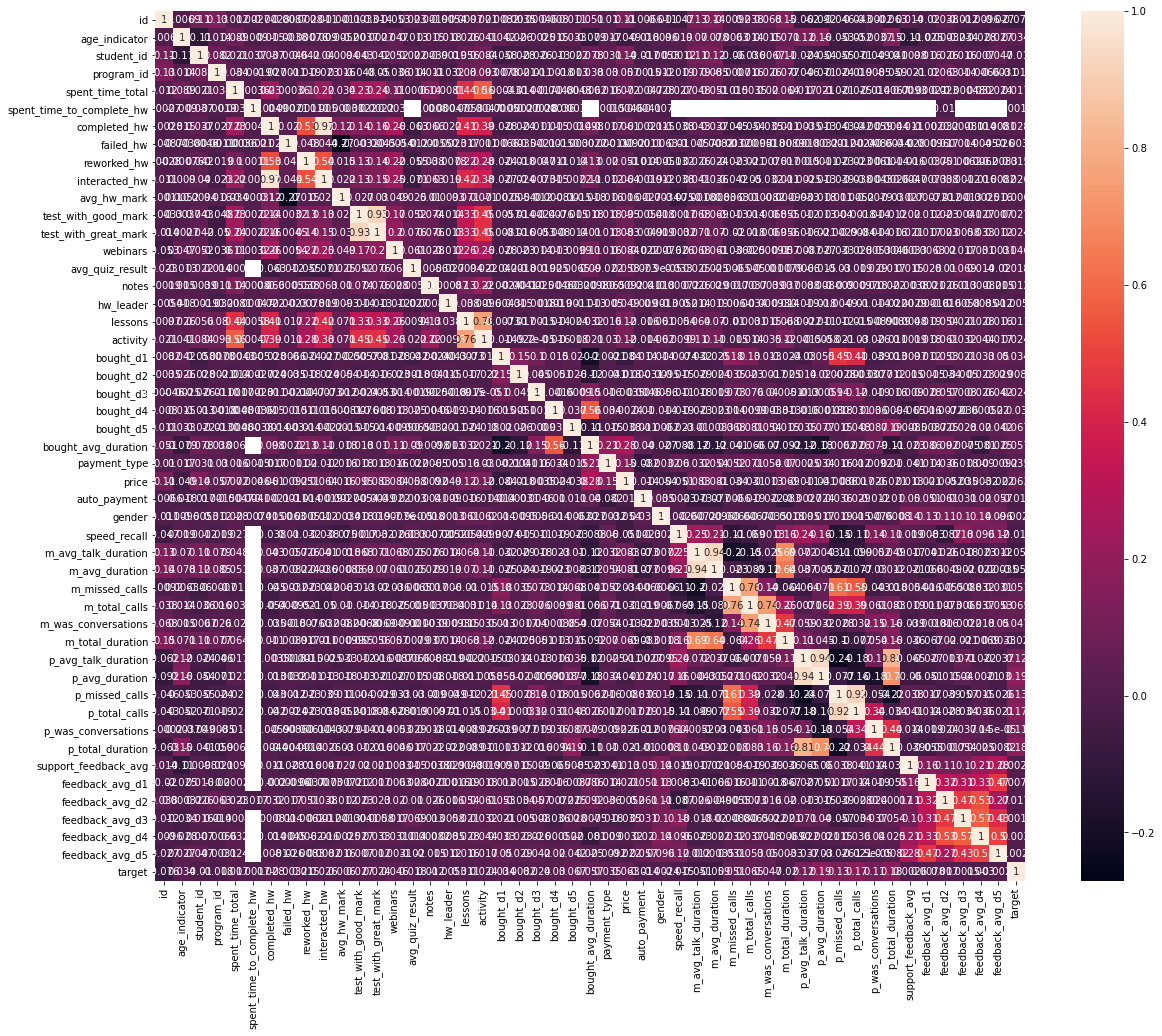

In [14]:
plt.figure(figsize = (20, 16))
sns.heatmap(train.corr(), square = True, annot=True)

In [31]:
train.columns

Index(['id', 'age_indicator', 'month_id', 'student_id', 'program_id',
       'carts_created_at', 'spent_time_total', 'spent_time_to_complete_hw',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4',
       'bought_d5', 'bought_avg_duration', 'payment_type', 'promo', 'price',
       'communication_type', 'auto_payment', 'ABC', 'city', 'country',
       'gender', 'speed_recall', 'os', 'browser', 'platform',
       'm_avg_talk_duration', 'm_avg_duration', 'm_missed_calls',
       'm_total_calls', 'm_was_conversations', 'm_total_duration',
       'p_avg_talk_duration', 'p_avg_duration', 'p_missed_calls',
       'p_total_calls', 'p_was_conversations', 'p_total_duration',
       'support_feedback_avg', 'feedback_avg_d1', 'feedback_avg_d2',
       'feedback_avg_d3', 'fee

##  –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ (train, test)

In [3]:
# —Å–ø–∏—Å–æ–∫ –ø–æ–ª–µ–π, –≤ –∫–æ—Ç–æ—Ä—ã—Ö NaN –±—É–¥—É—Ç –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ 0
columns = ['spent_time_total', 'spent_time_to_complete_hw',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4',
       'bought_d5', 'bought_avg_duration', 'communication_type', 'speed_recall', 
       'm_avg_talk_duration', 'm_avg_duration', 'm_missed_calls',
       'm_total_calls', 'm_was_conversations', 'm_total_duration',
       'p_avg_talk_duration', 'p_avg_duration', 'p_missed_calls',
       'p_total_calls', 'p_was_conversations', 'p_total_duration',
       'support_feedback_avg', 'feedback_avg_d1', 'feedback_avg_d2',
       'feedback_avg_d3', 'feedback_avg_d4', 'feedback_avg_d5']

# –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
train['age_indicator'] = train['age_indicator'].fillna(train['age_indicator'].median())
train['promo'] = train['promo'].map({'+': 1, '-': 0})
train['price'] = train['price'].fillna(train['price'].median())
train['communication_type'] = train['communication_type'].fillna('order')
train[columns] = train[columns].fillna(0)
train['gender'] = train['gender'].fillna(1)
#train['gender'] = train['gender'].map({0: np.random.uniform(1, 2)})
train['country'] = train['country'].fillna('–†–æ—Å—Å–∏—è')
train['city'] = train['city'].fillna('–ú–æ—Å–∫–≤–∞')
train['os'] = train['os'].fillna('Windows')
train['browser'] = train['browser'].fillna('Chrome')
train['platform'] = train['platform'].fillna('pc')

# —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –ø–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫
train.head(5)

id  age_indicator    month_id  student_id  program_id carts_created_at  \
0   15182           32.0   9/30/2020     6694527        1469        8/26/2020   
1   89385           20.0   6/30/2021     6712877        1392         8/5/2020   
2   47931           20.0   2/28/2021     6659444         376        6/20/2020   
3  279085            1.0  11/30/2021     7151591        1160        4/14/2021   
4    7806           30.0  10/31/2020     6705666         952        7/19/2020   

   spent_time_total  spent_time_to_complete_hw  completed_hw  failed_hw  \
0             163.0                        0.0           1.0        0.0   
1               0.0                        0.0           0.0        0.0   
2               0.0                        0.0           0.0        0.0   
3               0.0                        0.0           0.0        0.0   
4               0.0                        0.0           0.0        0.0   

   reworked_hw  interacted_hw  avg_hw_mark  test_with_good_mark  \
0         17.0            3.0        100.0                 12.0   
1          0.0            0.0          0.0                  0.0   
2          0.0            0.0          0.0                  0.0   
3          0.0            0.0          0.0                  0.0   
4          0.0            0.0          0.0                  0.0   

   test_with_great_mark  webinars  avg_quiz_result  notes  hw_leader  lessons  \
0                   8.0       0.0              0.0  147.0        0.0     14.0   
1                   0.0       0.0              0.0    0.0        0.0      0.0   
2                   0.0       0.0              0.0    0.0        0.0      0.0   
3                   0.0       0.0              0.0    0.0        0.0      0.0   
4                   0.0       0.0              0.0    0.0        0.0      0.0   

   activity  bought_d1  bought_d2  bought_d3  bought_d4  bought_d5  \
0      32.0          0          0          0          0          0   
1       0.0          0          0          0          0          0   
2       0.0          0          0          0          0          0   
3       0.0          0          0          0          0          0   
4       0.0          0          0          0          0          0   

   bought_avg_duration  payment_type  promo   price communication_type  \
0                  0.0             1      1 20043.0              phone   
1                  0.0             1      0 15057.3              order   
2                  0.0             1      1 23389.0                web   
3                  0.0             1      0 22260.6              order   
4                  0.0             1      0  7255.5              order   

   auto_payment ABC    city country  gender  speed_recall       os browser  \
0             0   D  –ú–æ—Å–∫–≤–∞  –†–æ—Å—Å–∏—è     1.0           0.0  Windows  Chrome   
1             1   A  –ú–æ—Å–∫–≤–∞  –†–æ—Å—Å–∏—è     0.0           1.0  Windows  Chrome   
2             0   D  –ú–æ—Å–∫–≤–∞  –†–æ—Å—Å–∏—è     0.0           0.0  Windows  Chrome   
3             1   B  –ú–æ—Å–∫–≤–∞  –†–æ—Å—Å–∏—è     1.0           0.0  Windows  Chrome   
4             1   A  –ú–æ—Å–∫–≤–∞  –†–æ—Å—Å–∏—è     1.0           0.0  Windows  Chrome   

  platform  m_avg_talk_duration  m_avg_duration  m_missed_calls  \
0       pc                  0.0             0.0             0.0   
1       pc                  0.0             0.0             0.0   
2       pc                  0.0             0.0             0.0   
3       pc                  0.0             0.0             0.0   
4       pc                  0.0             0.0             0.0   

   m_total_calls  m_was_conversations  m_total_duration  p_avg_talk_duration  \
0            0.0                  0.0               0.0                  0.0   
1            0.0                  0.0               0.0                  0.0   
2            0.0                  0.0               0.0                  0.0   
3            0.0                  0.0               0.0      

In [4]:
# –û–±—Ä–∞–±–æ—Ç–∫–∞ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
test['age_indicator'] = test['age_indicator'].fillna(test['age_indicator'].median())
test['promo'] = test['promo'].map({'+': 1, '-': 0})
test['price'] = test['price'].fillna(test['price'].median())
test['communication_type'] = test['communication_type'].fillna('order')
test[columns] = test[columns].fillna(0)
test['gender'] = test['gender'].fillna(1)
test['country'] = test['country'].fillna('–†–æ—Å—Å–∏—è')
test['city'] = test['city'].fillna('–ú–æ—Å–∫–≤–∞')
test['os'] = test['os'].fillna('Windows')
test['browser'] = test['browser'].fillna('Chrome')
test['platform'] = test['platform'].fillna('pc')

# —Ä–µ–∑—É–ª—å—Ç–∞—Ç, –ø–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫
test.head(5)

id  age_indicator   month_id  student_id  program_id carts_created_at  \
0   77551           20.0  5/31/2021     7064806        1395        2/28/2021   
1  227812           27.0  5/31/2021     6982061         245         1/1/2021   
2  103035            9.0  6/30/2021     7118790        1233        3/19/2021   
3  260943           20.0  9/30/2021     7288419         784        6/29/2021   
4  134611            7.0  8/31/2021     6949976         998       12/31/2020   

   spent_time_total  spent_time_to_complete_hw  completed_hw  failed_hw  \
0               0.0                        0.0           0.0        0.0   
1              81.0                        0.0           5.0        0.0   
2              49.0                        0.0           2.0        0.0   
3              10.0                        0.0           0.0        0.0   
4               0.0                        0.0           0.0        0.0   

   reworked_hw  interacted_hw  avg_hw_mark  test_with_good_mark  \
0          0.0            0.0          0.0                  0.0   
1         13.0            7.0        100.0                  4.0   
2          0.0            4.0        100.0                  0.0   
3          0.0            3.0          0.0                  0.0   
4          0.0            0.0          0.0                  0.0   

   test_with_great_mark  webinars  avg_quiz_result  notes  hw_leader  lessons  \
0                   0.0       0.0              0.0    0.0        0.0      0.0   
1                   0.0       6.0              0.0    0.0        0.0     24.0   
2                   0.0       1.0              0.0    0.0        0.0     12.0   
3                   0.0       1.0              0.0    0.0        0.0      5.0   
4                   0.0       0.0              0.0    0.0        0.0      0.0   

   activity  bought_d1  bought_d2  bought_d3  bought_d4  bought_d5  \
0       0.0          0          0          0          0          0   
1      32.0          0          0          0          0          0   
2      16.0          0          0          0          0          0   
3       2.0          0          0          0          0          0   
4       0.0          0          0          0          0          0   

   bought_avg_duration  payment_type  promo   price communication_type  \
0                  0.0             1      0 22186.2              order   
1                  0.0             1      0 64862.3                web   
2                  0.0             1      1 41637.6              order   
3                  0.0             1      0 11677.8              order   
4                  0.0             1      0  7886.0              order   

   auto_payment ABC    city country  gender  speed_recall       os  \
0             1   B  –ú–æ—Å–∫–≤–∞  –†–æ—Å—Å–∏—è     0.0           0.0  Windows   
1             0   D  –ú–æ—Å–∫–≤–∞  –†–æ—Å—Å–∏—è     1.0           0.0  Windows   
2             1   D  –ú–æ—Å–∫–≤–∞  –†–æ—Å—Å–∏—è     1.0           0.0      iOS   
3             0   C  –ú–æ—Å–∫–≤–∞  –†–æ—Å—Å–∏—è     0.0           0.0      iOS   
4             1   A  –ú–æ—Å–∫–≤–∞  –†–æ—Å—Å–∏—è     0.0           0.0  Android   

         browser platform  m_avg_talk_duration  m_avg_duration  \
0         Chrome       pc                  0.0             0.0   
1         Chrome       pc                 50.7            50.7   
2      Instagram   mobile                  0.0             0.0   
3       Facebook   mobile                153.0           153.0   
4  Chrome Mobile   mobile                  0.0             0.0   

   m_missed_calls  m_total_calls  m_was_conversations  m_total_duration  \
0             0.0            0.0                  0.0               0.0   
1             0.0            3.0                  3.0             152.0   
2             0.0            0.0                  0.0               0.0   
3             0.0            3.0                  3.0             459.0   
4             0.0            0.0                  0.0             

In [58]:
test.isna().sum()

id                           0
age_indicator                0
month_id                     0
student_id                   0
program_id                   0
carts_created_at             0
spent_time_total             0
spent_time_to_complete_hw    0
completed_hw                 0
failed_hw                    0
reworked_hw                  0
interacted_hw                0
avg_hw_mark                  0
test_with_good_mark          0
test_with_great_mark         0
webinars                     0
avg_quiz_result              0
notes                        0
hw_leader                    0
lessons                      0
activity                     0
bought_d1                    0
bought_d2                    0
bought_d3                    0
bought_d4                    0
bought_d5                    0
bought_avg_duration          0
payment_type                 0
promo                        0
price                        0
communication_type           0
auto_payment                 0
ABC     

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 59 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   age_indicator              200000 non-null  float64
 2   month_id                   200000 non-null  object 
 3   student_id                 200000 non-null  int64  
 4   program_id                 200000 non-null  int64  
 5   carts_created_at           200000 non-null  object 
 6   spent_time_total           200000 non-null  float64
 7   spent_time_to_complete_hw  200000 non-null  float64
 8   completed_hw               200000 non-null  float64
 9   failed_hw                  200000 non-null  float64
 10  reworked_hw                200000 non-null  float64
 11  interacted_hw              200000 non-null  float64
 12  avg_hw_mark                200000 non-null  float64
 13  test_with_good_mark        20

–ü—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∑–∞–ø–æ–ª–Ω–µ–Ω—ã, –æ—Å—Ç–∞–ª–∏—Å—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ª—è –≤ —Ñ–æ—Ä–º–∞—Ç–µ —Å—Ç—Ä–æ–∫–∏. –í –¥–∞–ª—å–Ω–µ–π—à–µ–º –º–æ–∂–Ω–æ –¥–∞–Ω–Ω—ã–µ –ø–æ–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –≤ —á–∏—Å–ª–∞, –ª–∏–±–æ —É–±—Ä–∞—Ç—å –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞.

<AxesSubplot:>

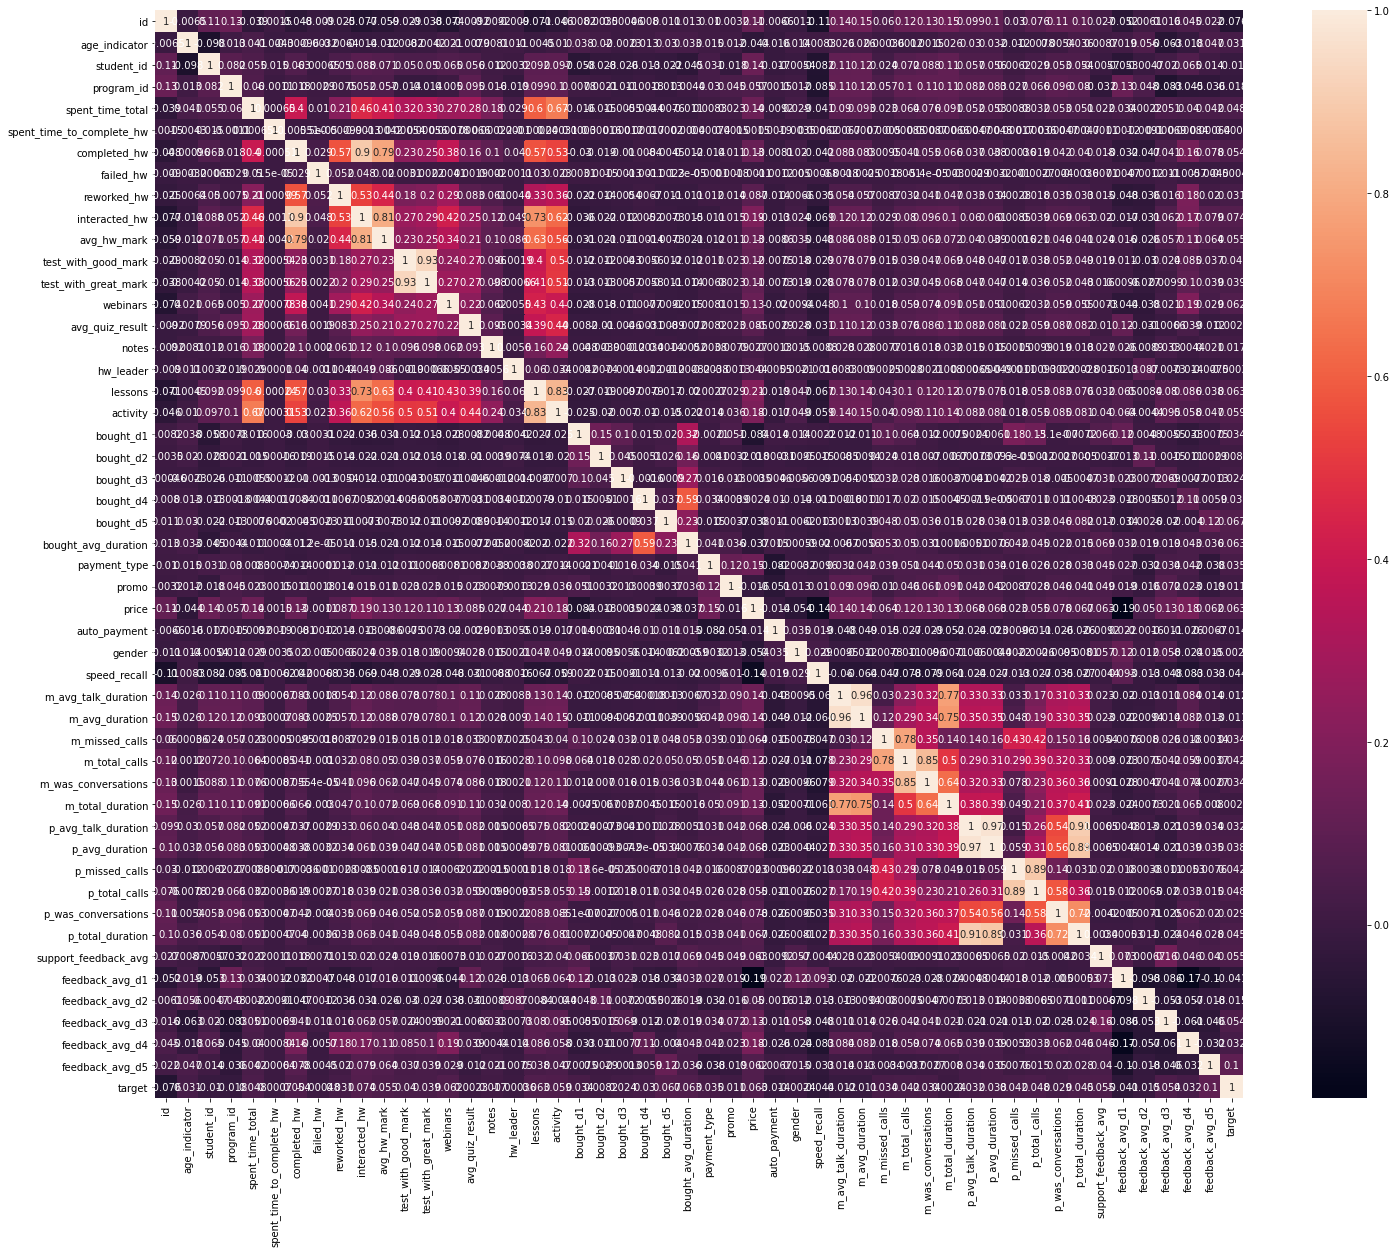

In [85]:
plt.figure(figsize = (25, 20))
sns.heatmap(train.corr(), square = True, annot=True)

–ü–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö —Ç–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ —Å—Ç–∞–ª–∞ –±–æ–ª–µ–µ —á–∏—Ç–∞–µ–º–æ–π. –ú–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å, —á—Ç–æ –≤ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–º –Ω–∞–±–æ—Ä–µ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å —Ç—Ä–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ –æ–ø–∏—Å—ã–≤–∞—é—Ç –ø—Ä–æ–≥—Ä–µ—Å—Å –æ–±—É—á–µ–Ω–∏—è, –æ–ø—ã—Ç –ø–æ–≤—Ç–æ—Ä–Ω—ã—Ö –ø–æ–∫—É–ø–æ–∫ –∏ –ø–æ–∫—É–ø–∫–∏ –ø–æ—Å–ª–µ –ø–æ–¥–∞—á–∏ –∑–∞—è–≤–∫–∏ –Ω–∞ —Å–∞–π—Ç–µ, –∞ —Ç–∞–∫–∂–µ –æ–ø—ã—Ç –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è —Å —Ç–µ–ª–µ–º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–º –∫–æ–º–ø–∞–Ω–∏–∏.

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ 

In [5]:
# –∫–æ–ø–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
data = train.drop(['month_id', 'carts_created_at'], axis=1).copy()
data.head()

id  age_indicator  student_id  program_id  spent_time_total  \
0   15182           32.0     6694527        1469             163.0   
1   89385           20.0     6712877        1392               0.0   
2   47931           20.0     6659444         376               0.0   
3  279085            1.0     7151591        1160               0.0   
4    7806           30.0     6705666         952               0.0   

   spent_time_to_complete_hw  completed_hw  failed_hw  reworked_hw  \
0                        0.0           1.0        0.0         17.0   
1                        0.0           0.0        0.0          0.0   
2                        0.0           0.0        0.0          0.0   
3                        0.0           0.0        0.0          0.0   
4                        0.0           0.0        0.0          0.0   

   interacted_hw  avg_hw_mark  test_with_good_mark  test_with_great_mark  \
0            3.0        100.0                 12.0                   8.0   
1            0.0          0.0                  0.0                   0.0   
2            0.0          0.0                  0.0                   0.0   
3            0.0          0.0                  0.0                   0.0   
4            0.0          0.0                  0.0                   0.0   

   webinars  avg_quiz_result  notes  hw_leader  lessons  activity  bought_d1  \
0       0.0              0.0  147.0        0.0     14.0      32.0          0   
1       0.0              0.0    0.0        0.0      0.0       0.0          0   
2       0.0              0.0    0.0        0.0      0.0       0.0          0   
3       0.0              0.0    0.0        0.0      0.0       0.0          0   
4       0.0              0.0    0.0        0.0      0.0       0.0          0   

   bought_d2  bought_d3  bought_d4  bought_d5  bought_avg_duration  \
0          0          0          0          0                  0.0   
1          0          0          0          0                  0.0   
2          0          0          0          0                  0.0   
3          0          0          0          0                  0.0   
4          0          0          0          0                  0.0   

   payment_type  promo   price communication_type  auto_payment ABC    city  \
0             1      1 20043.0              phone             0   D  –ú–æ—Å–∫–≤–∞   
1             1      0 15057.3              order             1   A  –ú–æ—Å–∫–≤–∞   
2             1      1 23389.0                web             0   D  –ú–æ—Å–∫–≤–∞   
3             1      0 22260.6              order             1   B  –ú–æ—Å–∫–≤–∞   
4             1      0  7255.5              order             1   A  –ú–æ—Å–∫–≤–∞   

  country  gender  speed_recall       os browser platform  \
0  –†–æ—Å—Å–∏—è     1.0           0.0  Windows  Chrome       pc   
1  –†–æ—Å—Å–∏—è     0.0           1.0  Windows  Chrome       pc   
2  –†–æ—Å—Å–∏—è     0.0           0.0  Windows  Chrome       pc   
3  –†–æ—Å—Å–∏—è     1.0           0.0  Windows  Chrome       pc   
4  –†–æ—Å—Å–∏—è     1.0           0.0  Windows  Chrome       pc   

   m_avg_talk_duration  m_avg_duration  m_missed_calls  m_total_calls  \
0                  0.0             0.0             0.0            0.0   
1                  0.0             0.0             0.0            0.0   
2                  0.0             0.0             0.0            0.0   
3                  0.0             0.0             0.0            0.0   
4                  0.0             0.0             0.0            0.0   

   m_was_conversations  m_total_duration  p_avg_talk_duration  p_avg_duration  \
0                  0.0               0.0                  0.0             0.0   
1                  0.0               0.0                  0.0             0.0   
2                  0.0               0.0                  0.0             0.0   
3                  0.0               0.0                  0.0             0.0   
4                  0.0               0.0                  0.

In [6]:
# —Å–ø–∏—Å–æ–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏–π
cat_features = ['communication_type', 'ABC', 'city', 'country', 'os', 'browser', 'platform']

# –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è –Ω–∞—Ä–µ–∑–∫–∏ –Ω–∞ –æ–±—É—á–∞—é—â–∏–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ
x = data.drop('target', axis=1)
y = data['target']


x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [7]:
# –∏–Ω–∏—Ü–∏–∞—Ü–∏—è –º–æ–¥–µ–ª–∏
cb = CatBoostClassifier(iterations=1000,
                           depth=12,
                           #learning_rate=0.05,
                           loss_function='MultiClass',
                           cat_features=cat_features,
                           eta=0.2,
                           auto_class_weights='SqrtBalanced',
                           verbose=100,
                           use_best_model=True,
                           custom_metric=['MultiClass',
                                          'AUC:hints=skip_train~false', 'F1']).fit(X=x_train, 
                                                                                    y=y_train,
                                                                                    cat_features=cat_features,
                                                                                    eval_set=(x_test, y_test),
                                                                                    verbose=100,
                                                                                    use_best_model=True,
                                                                                    plot=True)

# –ø–æ–ª—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
cb_predict_train = cb.predict(x_train)
cb_predict = cb.predict(x_test)

# —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
preds_class = cb.predict(x_test)
#preds_proba = cb.predict_proba(x_te)
print("class = ", preds_class)
#print("proba = ", preds_proba)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.5098637	test: 1.5175971	best: 1.5175971 (0)	total: 11.4s	remaining: 3h 9m 42s
100:	learn: 0.3859179	test: 0.6219046	best: 0.6219046 (100)	total: 15m 42s	remaining: 2h 19m 44s
200:	learn: 0.1948953	test: 0.5042980	best: 0.5042977 (199)	total: 31m 33s	remaining: 2h 5m 27s
300:	learn: 0.1287925	test: 0.4743408	best: 0.4742136 (299)	total: 48m 29s	remaining: 1h 52m 36s
400:	learn: 0.0938741	test: 0.4640879	best: 0.4640879 (400)	total: 1h 5m 10s	remaining: 1h 37m 21s
500:	learn: 0.0738522	test: 0.4634492	best: 0.4632246 (498)	total: 1h 22m 8s	remaining: 1h 21m 48s
600:	learn: 0.0602123	test: 0.4635621	best: 0.4626253 (549)	total: 1h 39m 39s	remaining: 1h 6m 9s
700:	learn: 0.0497973	test: 0.4628271	best: 0.4618932 (659)	total: 1h 57m 25s	remaining: 50m 5s
800:	learn: 0.0423649	test: 0.4658385	best: 0.4618932 (659)	total: 2h 15m 5s	remaining: 33m 33s
900:	learn: 0.0360290	test: 0.4686486	best: 0.4618932 (659)	total: 2h 33m 13s	remaining: 16m 50s
999:	learn: 0.0318757	test: 0.47196

In [8]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –æ–±—É—á–µ–Ω–∞ –ª–∏ –º–æ–¥–µ–ª—å
cb.is_fitted()

True

In [60]:
# —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
cb.save_model('catboostclassifier', format="cbm")

In [9]:
print('–°–∫–æ—Ä –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:', cb.score(x_train, y_train),
      '–°–∫–æ—Ä –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:', cb.score(x_test, y_test))

–°–∫–æ—Ä –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.9955928571428572 –°–∫–æ—Ä –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.9427


# –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏

–í –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ç—Ä–∏–∫–∏ –≤—ã—Å—Ç—É–ø–∞–µ—Ç –≤–∑–≤–µ—à–µ–Ω–Ω–∞—è —Å—É–º–º–∞ Recall –∏ Precision –ø–æ
—Å–ª–µ–¥—É—é—â–µ–π —Ñ–æ—Ä–º—É–ª–µ:
<br><br>
ùëÖùëíùë†ùë¢ùëôùë° = 0. 2 * ùëÖùëíùëêùëéùëôùëô + 0. 8 * ùëÉùëüùëíùëêùëñùë†ùëñùëún

In [10]:
recall = recall_score(y_test, cb_predict, average='weighted')

precision = precision_score(y_test, cb_predict, average='weighted')

result = 0.2 * recall + 0.8 * precision

print('Result =', result)

Result = 0.9404657028780958


# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ñ–∞–π–ª–∞ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏

In [11]:
# —É–±–∏—Ä–∞–µ–º –∫–æ–ª–æ–Ω–∫–∏ —Å –¥–∞—Ç–∞–º–∏
test.drop(['month_id', 'carts_created_at'], axis=1, inplace=True)

In [12]:
# –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
test_predict = cb.predict(test)
test_predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

–î–ª—è —Å–¥–∞—á–∏ —Ä–∞–±–æ—Ç—ã –Ω–∞ –ø—Ä–æ–≤–µ—Ä–∫—É –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è —Å–æ–±—Ä–∞—Ç—å —Ç–∞–±–ª–∏—Ü—É, –≤ –∫–æ—Ç–æ—Ä–æ–π —Å–æ–¥–µ—Ä–∂–∞—Ç—Å—è id –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è target. –°–ª–µ–¥—É—é—â–∏–º —à–∞–≥–æ–º –±—É–¥–µ—Ç —Å–æ–∑–¥–∞–Ω–∏–µ csv —Ñ–∞–π–ª–∞ –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º—É.

In [13]:
# –æ—Ç–±–æ—Ä id 
result_data = pd.DataFrame(test['id'])

# –æ—Ç–±–æ—Ä –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤
result_predict = pd.DataFrame(test_predict, columns=['target'])

# –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
data_check = result_data.merge(right=result_predict, how='inner', 
                                on=None, 
                                left_on=None, 
                                right_on=None, 
                                left_index=True, 
                                right_index=True, 
                                sort=False, 
                                #suffixes=('_x', '_y'), 
                                copy=True, 
                                indicator=False, 
                                validate=None)

# –ø–µ—Ä–µ–≤–æ–¥ target –≤ —Ñ–æ—Ä–º–∞—Ç —Å—Ç—Ä–æ–∫–∏, —Ç.–∫. –±—ã–≤–∞–µ—Ç, —á—Ç–æ –Ω—É–ª–∏ (—Ç.–µ. –Ω—É–ª–µ–≤–æ–π –∫–ª–∞—Å—Å –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ) —É–¥–∞–ª—è—é—Ç—Å—è –ø—Ä–∏ —ç–∫—Å–ø–æ—Ä—Ç–µ –≤ csv
data_check['target'] = data_check['target'].astype('str')

data_check

id target
0       77551      0
1      227812      0
2      103035      0
3      260943      0
4      134611      0
...       ...    ...
84992  186427      0
84993  197918      0
84994  174961      0
84995  182226      0
84996   95178      0

[84997 rows x 2 columns]

In [78]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –ø–µ—Ä–µ—Ñ–æ—Ä–º–∞—Ç–∏—Ä–æ–≤–∞–Ω–∏—è —Å—Ç—Ä–æ–∫–∏
data_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84997 entries, 0 to 84996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      84997 non-null  int64 
 1   target  84997 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [14]:
# —ç–∫—Å–ø–æ—Ä—Ç –¥–∞–Ω–Ω—ã—Ö –≤ csv
data_check.to_csv('sample_solution_eta02_str.csv', index=False, encoding='utf-8')